# Preprocessing of CS2_35
by konkon

Preparing discharge capacity vs. cycle number data for time series analysis.  
Data from https://calce.umd.edu/data#CS2  
  
After Download data, unzip and place it at same directory.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import glob

In [66]:
path = glob.glob('./CS2_35/*.xlsx')

# Sort path by analysis date

In [25]:
dates = []
for p in path:
    df = pd.read_excel(p, sheet_name=1)
    print('Load '+str(p)+' ...')
    dates.append(df['Date_Time'][0])

Load ./CS2_35\CS2_35_10_15_10.xlsx ...
Load ./CS2_35\CS2_35_10_22_10.xlsx ...
Load ./CS2_35\CS2_35_10_29_10.xlsx ...
Load ./CS2_35\CS2_35_11_01_10.xlsx ...
Load ./CS2_35\CS2_35_11_08_10.xlsx ...
Load ./CS2_35\CS2_35_11_23_10.xlsx ...
Load ./CS2_35\CS2_35_11_24_10.xlsx ...
Load ./CS2_35\CS2_35_12_06_10.xlsx ...
Load ./CS2_35\CS2_35_12_13_10.xlsx ...
Load ./CS2_35\CS2_35_12_20_10.xlsx ...
Load ./CS2_35\CS2_35_12_23_10.xlsx ...
Load ./CS2_35\CS2_35_1_10_11.xlsx ...
Load ./CS2_35\CS2_35_1_18_11.xlsx ...
Load ./CS2_35\CS2_35_1_24_11.xlsx ...
Load ./CS2_35\CS2_35_1_28_11.xlsx ...
Load ./CS2_35\CS2_35_2_4_11.xlsx ...
Load ./CS2_35\CS2_35_8_17_10.xlsx ...
Load ./CS2_35\CS2_35_8_18_10.xlsx ...
Load ./CS2_35\CS2_35_8_19_10.xlsx ...
Load ./CS2_35\CS2_35_8_30_10.xlsx ...
Load ./CS2_35\CS2_35_9_21_10.xlsx ...
Load ./CS2_35\CS2_35_9_30_10.xlsx ...
Load ./CS2_35\CS2_35_9_7_10.xlsx ...
Load ./CS2_35\CS2_35_9_8_10.xlsx ...


In [26]:
idx = np.argsort(dates)
path_sorted = np.array(path)[idx]

# Example of processing

## cf. Step Index meaning
* 2: Constant Current Charging
* 4: Constant Voltage Charging
* 7: Constant Current Discharging

In [52]:
df = pd.read_excel(path[10],sheet_name=1)

<Figure size 504x288 with 0 Axes>

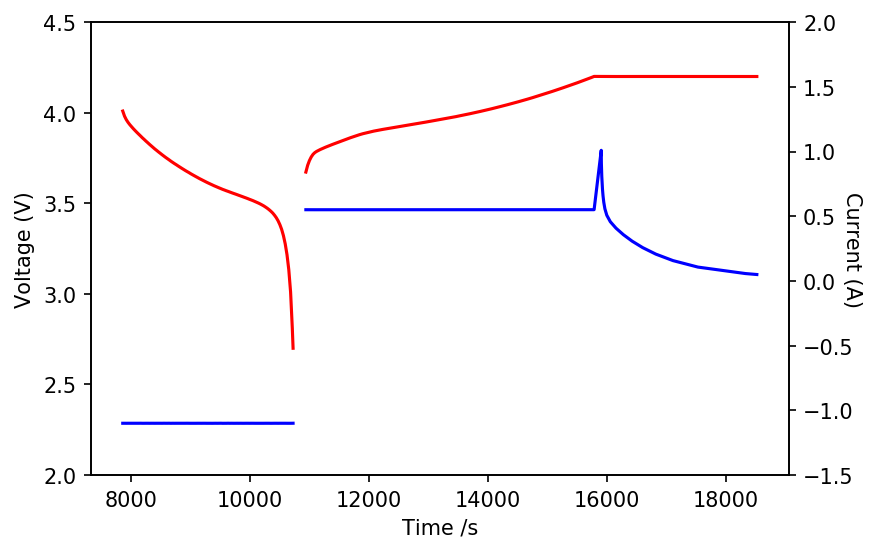

In [53]:
fig = plt.figure(figsize=(7,4))

cycles = list(set(df['Cycle_Index']))
for c in cycles:
    df_lim = df[df['Cycle_Index'] == c]
    #Charging
    df_c = df_lim[(df_lim['Step_Index'] == 2)|(df_lim['Step_Index'] == 4)]
    c_v = df_c['Voltage(V)']
    c_c = df_c['Current(A)']
    c_t = df_c['Test_Time(s)']
    #Discharging
    df_d = df_lim[df_lim['Step_Index'] == 7]
    d_v = df_d['Voltage(V)']
    d_c = df_d['Current(A)']
    d_t = df_d['Test_Time(s)']
    
    if(c == 2):
        HI = []
#         for d in d_v:
#             dec = np.abs(np.array(d_v) - 3.8)
#             HI.append(np.array(d_t)[np.argmin(dec)])
#             dec = np.abs(np.array(d_v) - 3.4)
#             HI.append(np.array(d_t)[np.argmin(dec)])
        
        fig,ax1 = plt.subplots(dpi=150)
        ax1.plot(pre_dt,pre_dv,c='r')
        ax1.plot(c_t,c_v,c='r')
        ax1.set_ylim(2,4.5)
        ax2 = ax1.twinx()
        ax2.plot(c_t,c_c,c='b')
        ax2.plot(pre_dt,pre_dc,c='b')
        ax2.set_ylim(-1.5,2)
        ax1.set_xlabel('Time /s')
        ax1.set_ylabel('Voltage (V)')
        ax2.set_ylabel('Current (A)',rotation=-90)


#         plt.plot([HI[0],HI[0]],[0,3.8],c='black',ls='--')
#         plt.plot([HI[1],HI[1]],[0,3.4],c='black',ls='--')
#         plt.plot([np.min(d_t),HI[0]],[3.8,3.8],c='black',ls='--')
#         plt.plot([np.min(d_t),HI[1]],[3.4,3.4],c='black',ls='--')
        
    pre_dt = d_t
    pre_dv = d_v
    pre_dc = d_c
    
#         plt.ylim(2.5,4.1)
#         plt.xlim(np.min(d_t),np.max(d_t))

# Preprocessing
Finally, these data are obtained for each cycle

* discharge capacities (Ah)
* health indicater (sum of capacities between 3.8 V to 3.4 V while discharging) (Ah)
* internal resistance (ohm)
* CCCT (Constant Current charging time) (s)
* CVCT (Constant Voltage charging time) (s)

In [7]:
count = 0
discharge_capacities = []
health_indicator = []
internal_resistance = []
CCCT = []
CVCT = []

for p in path_sorted:
    df = pd.read_excel(p,sheet_name=1)
    print('Load '+str(p)+' ...')
    cycles = list(set(df['Cycle_Index']))
    for c in cycles:
        df_lim = df[df['Cycle_Index'] == c]
        #Charging
        df_c = df_lim[(df_lim['Step_Index'] == 2)|(df_lim['Step_Index'] == 4)]
        c_v = df_c['Voltage(V)']
        c_c = df_c['Current(A)']
        c_t = df_c['Test_Time(s)']
        #CC or CV
        df_cc = df_lim[df_lim['Step_Index'] == 2]
        df_cv = df_lim[df_lim['Step_Index'] == 4]
        CCCT.append(np.max(df_cc['Test_Time(s)'])-np.min(df_cc['Test_Time(s)']))
        CVCT.append(np.max(df_cv['Test_Time(s)'])-np.min(df_cv['Test_Time(s)']))
        
        #Discharging
        df_d = df_lim[df_lim['Step_Index'] == 7]
        d_v = df_d['Voltage(V)']
        d_c = df_d['Current(A)']
        d_t = df_d['Test_Time(s)']
        d_im = df_d['Internal_Resistance(Ohm)']
        
        if(len(list(d_c)) != 0):
            time_diff = np.diff(list(d_t))
            d_c = np.array(list(d_c))[1:]
            discharge_capacity = time_diff*d_c/3600 # Q = A*h
            discharge_capacity = [np.sum(discharge_capacity[:n]) for n in range(discharge_capacity.shape[0])]
            discharge_capacities.append(-1*discharge_capacity[-1])
            
            dec = np.abs(np.array(d_v) - 3.8)[1:]
            start = np.array(discharge_capacity)[np.argmin(dec)]
            dec = np.abs(np.array(d_v) - 3.4)[1:]
            end = np.array(discharge_capacity)[np.argmin(dec)]
            health_indicator.append(-1 * (end - start))
            
            internal_resistance.append(np.mean(np.array(d_im)))
            
            count += 1
            
discharge_capacities = np.array(discharge_capacities)
health_indicator = np.array(health_indicator)
internal_resistance = np.array(internal_resistance)
CCCT = np.array(CCCT)
CVCT = np.array(CVCT)

Load ./CS2_35\CS2_35_8_17_10.xlsx ...
Load ./CS2_35\CS2_35_8_18_10.xlsx ...
Load ./CS2_35\CS2_35_8_19_10.xlsx ...
Load ./CS2_35\CS2_35_8_30_10.xlsx ...
Load ./CS2_35\CS2_35_9_7_10.xlsx ...
Load ./CS2_35\CS2_35_9_8_10.xlsx ...
Load ./CS2_35\CS2_35_9_21_10.xlsx ...
Load ./CS2_35\CS2_35_9_30_10.xlsx ...
Load ./CS2_35\CS2_35_10_15_10.xlsx ...
Load ./CS2_35\CS2_35_10_22_10.xlsx ...
Load ./CS2_35\CS2_35_10_29_10.xlsx ...
Load ./CS2_35\CS2_35_11_01_10.xlsx ...
Load ./CS2_35\CS2_35_11_08_10.xlsx ...
Load ./CS2_35\CS2_35_11_23_10.xlsx ...
Load ./CS2_35\CS2_35_11_24_10.xlsx ...
Load ./CS2_35\CS2_35_12_06_10.xlsx ...
Load ./CS2_35\CS2_35_12_13_10.xlsx ...
Load ./CS2_35\CS2_35_12_20_10.xlsx ...
Load ./CS2_35\CS2_35_12_23_10.xlsx ...
Load ./CS2_35\CS2_35_1_10_11.xlsx ...
Load ./CS2_35\CS2_35_1_18_11.xlsx ...
Load ./CS2_35\CS2_35_1_24_11.xlsx ...
Load ./CS2_35\CS2_35_1_28_11.xlsx ...
Load ./CS2_35\CS2_35_2_4_11.xlsx ...


# Dropping outliers

In [67]:
def drop_outlier(array,count,bins):
    index = []
    range_ = np.arange(1,count,bins)
    for i in range_[:-1]:
        array_lim = array[i:i+bins]
        sigma = np.std(array_lim)
        mean = np.mean(array_lim)
        th_max,th_min = mean + sigma*2, mean - sigma*2
        idx = np.where((array_lim < th_max) & (array_lim > th_min))
        idx = idx[0] + i
        index.extend(list(idx))
    return np.array(index)

In [68]:
idx = drop_outlier(discharge_capacities,count,40)

In [69]:
df_result = pd.DataFrame({'cycle':np.linspace(1,idx.shape[0],idx.shape[0]),
                          'capacity':discharge_capacities[idx],
                          'SoH':health_indicator[idx],
                          'resistance':internal_resistance[idx],
                          'CCCT':CCCT[idx],
                          'CVCT':CVCT[idx]})

# Preprocessed data example

In [70]:
df_result[:10]

,cycle,capacity,SoH,resistance,CCCT,CVCT
0,1.0,1.126385,0.825175,0.094009,6613.059052,2251.498033
1,2.0,1.126160,0.815965,0.091661,6612.402800,2231.967052
2,3.0,1.125966,0.815977,0.094649,6608.560673,2228.216959
3,4.0,1.118508,0.825194,0.091413,6604.732222,2247.561061
4,5.0,1.117210,0.806900,0.091413,6629.211049,2077.692393
5,6.0,1.113754,0.797717,0.088416,6619.934535,2042.678389
6,7.0,1.098818,0.806818,0.092305,6519.983304,2166.889987
7,8.0,1.096180,0.797619,0.093031,6455.685388,2159.858662
8,9.0,1.089871,0.797627,0.090850,6427.498205,2151.903193
9,10.0,1.087582,0.788454,0.091578,6405.686007,2144.327434


# Discharge Capacities vs. Number of Cycle

(-10, 860)

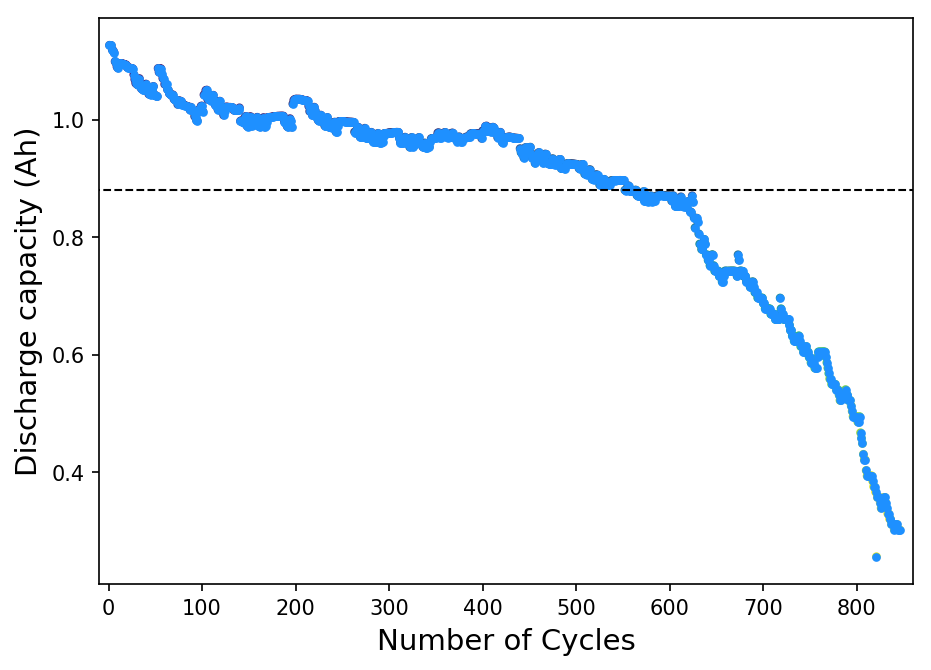

In [71]:
plt.figure(figsize=(7,5),dpi=150)
plt.scatter(df_result['cycle'],df_result['capacity'],c=df_result['resistance'],s=10)
plt.scatter(df_result['cycle'],df_result['capacity'],c='dodgerblue',s=10)
plt.plot([-100,1000],[1.1*0.8,1.1*0.8],c='black',lw=1,ls='--')
# cbar = plt.colorbar()
# cbar.set_label('Internal Resistance (Ohm)',fontsize=14,rotation=-90,labelpad=20)
plt.xlabel('Number of Cycles',fontsize=14)
plt.ylabel('Discharge capacity (Ah)',fontsize=14)
plt.xlim(-10,860)

# Discharge Capacities with Internal Resistance

Text(0, 0.5, 'State of Health')

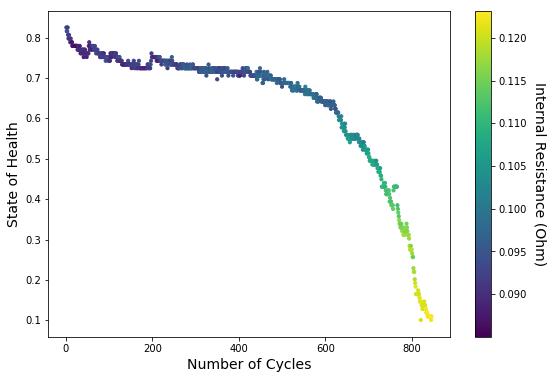

In [72]:
plt.figure(figsize=(9,6))
plt.scatter(df_result['cycle'],df_result['SoH'],c=df_result['resistance'],s=10)
cbar = plt.colorbar()
cbar.set_label('Internal Resistance (Ohm)',fontsize=14,rotation=-90,labelpad=20)
plt.xlabel('Number of Cycles',fontsize=14)
plt.ylabel('State of Health',fontsize=14)

# Plotting each parameters vs. number of cycle

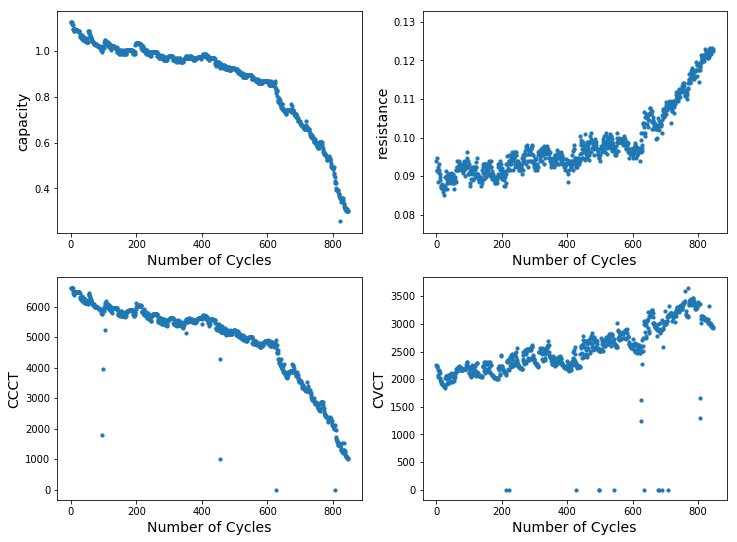

In [73]:
plt.figure(figsize=(12,9))
names = ['capacity', 'resistance','CCCT','CVCT']
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.scatter(df_result['cycle'],df_result[names[i]],s=10)
    plt.xlabel('Number of Cycles',fontsize=14)
    plt.ylabel(names[i],fontsize=14)

# Save results as csv

In [43]:
df_result.to_csv('CS2_35.csv')